**Task 0**

*Import the data and declare your package dependencies.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [145]:
import statsmodels.api as sm
import pandas as pd

avo = pd.read_csv('/content/drive/My Drive/avocado-updated-2020.csv')
avo.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


**Task 1**


*Briefly describe the data set. What information does it contain?*

This dataset contains information about Avocados sold in the United States from 4 January 2015 up to 17 May 2020.  This information was obtained from the Hass Avocado Board website merged with an already existing dataset published to Kaggle by Justin Kiggins in 2018.  The dataset provides data on avacado prices and sales volume in multiple cities, states, and regions of the US.  There are afew things we are going to have to do to clean this data to be more easily understood and to get better insights.  The first thing we should do is make sure each column is approriately named.  This would mean changing the 4046, 4225, and 4770 columns to be named small, large, and xlarge, respectively, as these values corresond to the PLU value of the avocado.  The next thing we would do is categorize the geographical regions into categories that make sense, ie. only include data gathered from a city/metro region.  After doing so, this data will tell a better story.

**Task 2**


*Clean the data in any way you see fit.*

In [146]:
# Change variable names "4046", "4225", and "4770" to "small", "large", and "xlarge", respectively
avo.rename(columns={'4046': 'small', '4225': 'large', '4770': 'xlarge'}, inplace=True)

In [147]:
# Create a new dataframe and categorize data by city, getting rid of data for states and regions
city_filtered_avo = avo.query('geography not in ["California", "Great Lakes", "Midsouth", "Northeast", "Northern New England", "Plains", "South Carolina", "Southeast", "South Central", "Total U.S.", "West", "West Tex/New Mexico"]')

# Change variable "New York" to "NYC"
city_filtered_avo.replace('New York', 'NYC', inplace=True)
city_filtered_avo.head()

<ipython-input-147-3422b953d9ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [148]:
# Create a new dataframe and categorize data by geographic region, getting rid of states and cities
region_filtered_avo = avo.query('geography in ["Midsouth", "Northeast", "Plains", "Southeast", "South Central", "West"]')
region_filtered_avo

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
50,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,314.80,conventional,2015,Midsouth
51,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,0.00,organic,2015,Midsouth
58,2015-01-04,1.09,3759282.62,126640.65,2860709.93,7580.38,764351.66,669970.50,94381.16,0.00,conventional,2015,Northeast
59,2015-01-04,1.88,48280.46,4476.73,22389.09,23.15,21391.49,21379.79,11.70,0.00,organic,2015,Northeast
70,2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33028,2020-11-29,1.21,158664.34,11229.49,1403.69,1671.19,144359.97,97499.68,46860.29,0.00,organic,2020,South Central
33029,2020-11-29,0.70,5074329.31,2288488.28,169801.18,1876.23,2614148.83,2187694.31,408444.24,18010.28,conventional,2020,Southeast
33030,2020-11-29,1.23,141358.02,1149.87,5916.04,47.60,134244.51,79452.47,37802.46,16989.58,organic,2020,Southeast
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West


**Task 3**

*Which major geographical region sold the most total organic, small Hass avocados in 2017?*

In [149]:
# filter out all "conventional" and non "2017" values from the "region_filtered_avo" dataframe
small_filter = region_filtered_avo[(region_filtered_avo['type'] == 'organic') & (region_filtered_avo['year'] == 2017)]

In [151]:
small_filter.head()

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
11282,2017-01-01,1.72,72287.79,3353.64,36090.72,1813.60,31029.83,29203.33,1826.50,0.0,organic,2017,Midsouth
11290,2017-01-01,2.00,115256.09,9132.13,36276.39,923.53,68924.04,65447.53,3476.51,0.0,organic,2017,Northeast
11302,2017-01-01,1.62,47042.21,4547.17,15245.73,1366.36,25882.95,17253.74,8629.21,0.0,organic,2017,Plains
11322,2017-01-01,1.23,66616.54,22474.95,4797.17,17.37,39327.05,37358.81,1968.24,0.0,organic,2017,South Central
11324,2017-01-01,1.43,49777.56,4157.31,9930.60,262.28,35427.37,15637.05,19790.32,0.0,organic,2017,Southeast


In [152]:
# Group by geography and calculate total vlume of small avocados sold
small_filter = small_filter.groupby('geography').agg({'small': 'sum'})

In [153]:
# Find the geography with the most avocados
max_small_filter = small_filter['small'].idxmax()
max_small_filter

'West'

In [154]:
# Calculate total number of small avocados sold in LA
West_sold = small_filter['small'].max()
West_sold

1870206.29

"West" was the major geographical region that sold the most total organic, small Hass avocados in 2017, with 1870206.29 sold.

**Task 4**

*Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?*

In [156]:
# Split data into month, day
import datetime as dt

avo['date'] = pd.to_datetime(avo['date'])
avo['month'] = avo['date'].dt.month
avo['day'] = avo['date'].dt.day
avo.head()

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,4


In [157]:
# Find which month has the highest average volume of avocado sales
month_filter = avo.groupby('month')['total_volume'].mean()
max_sales_month = month_filter.idxmax()
max_sales_month

5

In [158]:
month_avg_sales = month_filter.max()
month_avg_sales

1123632.254218107

The month with the highest average volume of avacado sales was May with 1123632.25 avocados sold.

**Task 5**

*Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.*

In [159]:
# Filter "city_filtered_avo" by geography and find which region sold the most total avocados
city_filter = city_filtered_avo.groupby('geography')['total_volume'].sum()
avo_city = city_filter.idxmax()
avo_city

'Los Angeles'

In [160]:
LA_total = city_filter.max()
LA_total

959350488.02

The metro area geographical region that sold the most total avocados was Los Angeles with 959350488.02 avocados.

In [161]:
# Find the five metro geographical regions with the highest averages for the total_volume variable.
city_filter2 = city_filtered_avo.groupby('geography')['total_volume'].mean()
city_filter2 = city_filter2.sort_values(ascending=False)
city_filter2.head()

geography
Los Angeles         1.567566e+06
NYC                 8.631458e+05
Dallas/Ft. Worth    7.127519e+05
Houston             6.876533e+05
Phoenix/Tucson      6.250383e+05
Name: total_volume, dtype: float64

The five metro geographical regions with the highest averages for the total_volume variable are Los Angeles, NYC, Dallas/Ft. Worth, Houston, and Phoenix/Tucson.

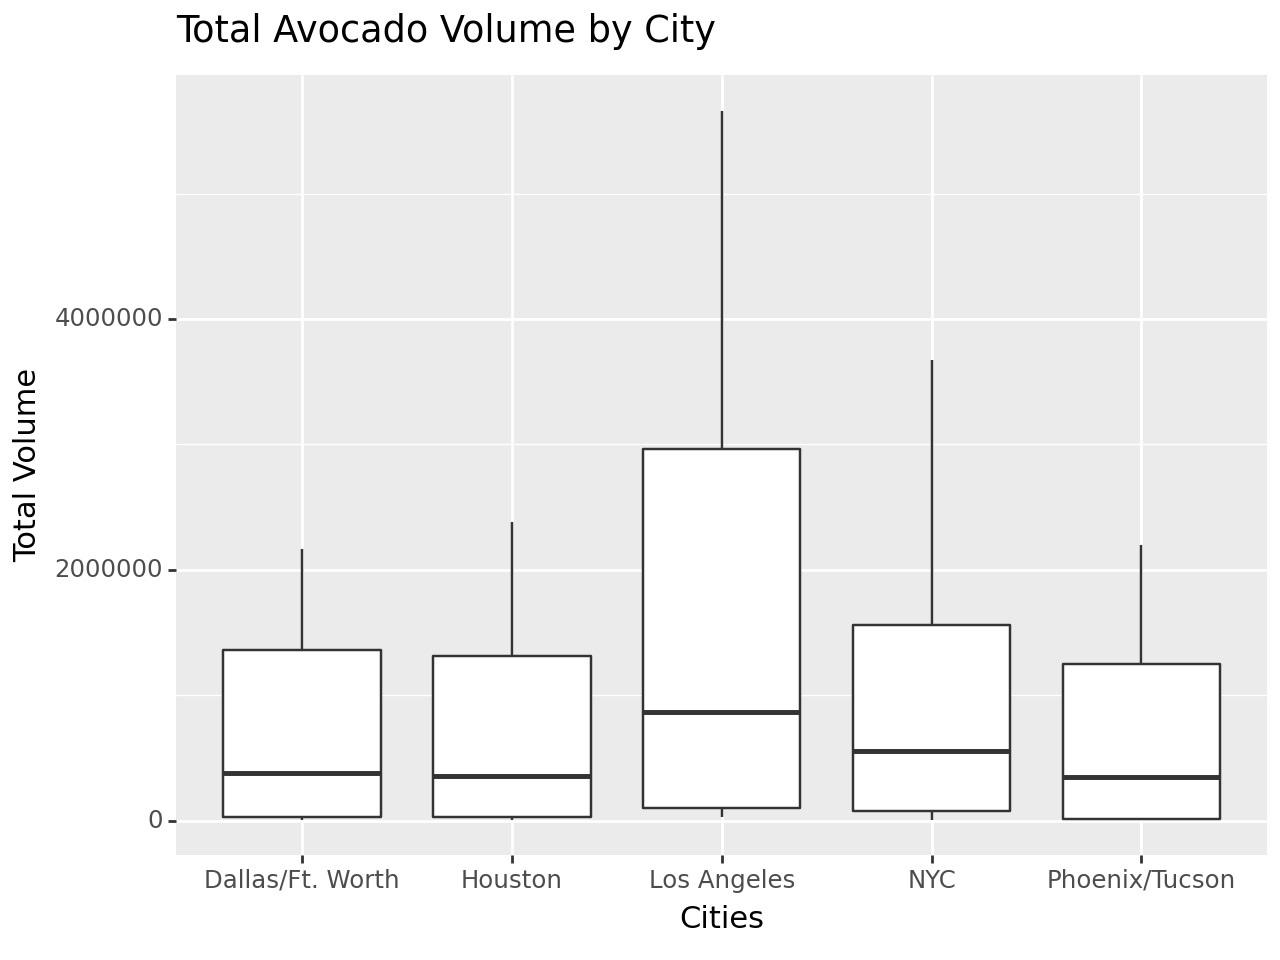

<Figure Size: (640 x 480)>

In [162]:
# Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.
top5_cities = city_filtered_avo.query('geography in ["Los Angeles", "NYC", "Dallas/Ft. Worth", "Houston", "Phoenix/Tucson"]')

import plotnine as gg
from plotnine import *

Plot = (ggplot(top5_cities,
aes(
  x='geography',
  y='total_volume'
))
+ labs(x = 'Cities',
       y = 'Total Volume',
       title = 'Total Avocado Volume by City')
+ geom_boxplot())
Plot

**Task 6**

*From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.*

In [164]:
# Create a data set with only "Los Angeles", "San Diego", "Sacramento", and "San Francisco"
CA_regions = avo.query('geography in ["Los Angeles", "San Diego", "Sacramento",  "San Francisco"]')
CA_regions.head()

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,1,4


**Task 7**

*In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.*

In [55]:
# Filter dataframe for "CA_regions" to only include "organic" types and find the mean of "average_price" for each city
CA_organic = CA_regions[CA_regions['type'] == "organic"]
CA_organic = CA_organic.groupby('geography')['average_price'].mean()

# Filter dataframe for "CA_regions" to only include "conventional" types and find the mean of "avergae_price" for each city
CA_conventional = CA_regions[CA_regions['type'] == "conventional"]
CA_conventional = CA_conventional.groupby('geography')['average_price'].mean()

# Subtract the CA_convetional means from the CA_organic means
CA_diff = CA_organic - CA_conventional
CA_diff = CA_diff.reset_index()
CA_diff


,geography,average_price
0,Los Angeles,0.527778
1,Sacramento,0.578497
2,San Diego,0.684510
3,San Francisco,0.718954


This calculation subtracting the mean of the CA_conventional means from the CA_organic means shows that San Francisco has the largest difference.

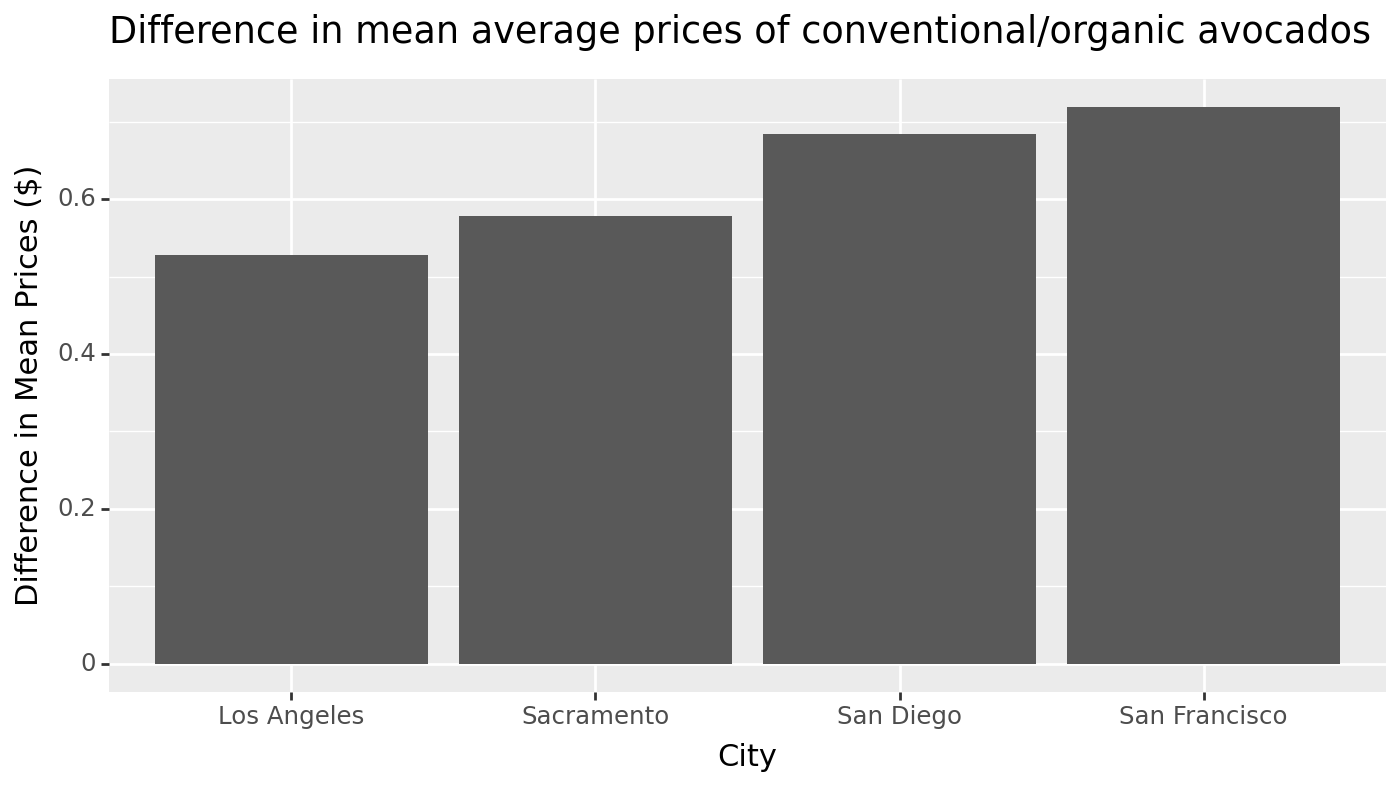

<Figure Size: (700 x 400)>

In [70]:
Plot2 = (ggplot(CA_diff)
+ geom_col(aes(
  x = "geography",
  y = "average_price"))
+ labs(x = "City",
       y = "Difference in Mean Prices ($)")
+ labs(title = "Difference in mean average prices of conventional/organic avocados")
+ theme(figure_size = (7,4))
)
Plot2

Here is a bar plot showing the differences in mean average prices of conventional and organic avocados.  Clearly San Francisco has the largest difference in the means.

In [60]:
# Filter dataframe for "CA_regions" to only include "organic" types and find the max of "average_price" for each city
CA_organic2 = CA_regions[CA_regions['type'] == "organic"]
CA_organic2 = CA_organic2.groupby('geography')['average_price'].max()

# Filter dataframe for "CA_regions" to only include "conventional" types and find the min of "average_price" for each city
CA_conventional2 = CA_regions[CA_regions['type'] == "conventional"]
CA_conventional2 = CA_conventional2.groupby('geography')['average_price'].min()

# Subtract the CA_convetional min from the CA_organic max
CA_diff2 = CA_organic2 - CA_conventional2
CA_diff2 = CA_diff2.reset_index()
CA_diff2


,geography,average_price
0,Los Angeles,1.91
1,Sacramento,1.96
2,San Diego,2.17
3,San Francisco,2.41


This is what we would get if we wanted to find this biggest difference between the cheapest conventional avocado on average and the most expensive avocado on average for each city.  Once again, we see that San francisco has the largest difference in the 2.  

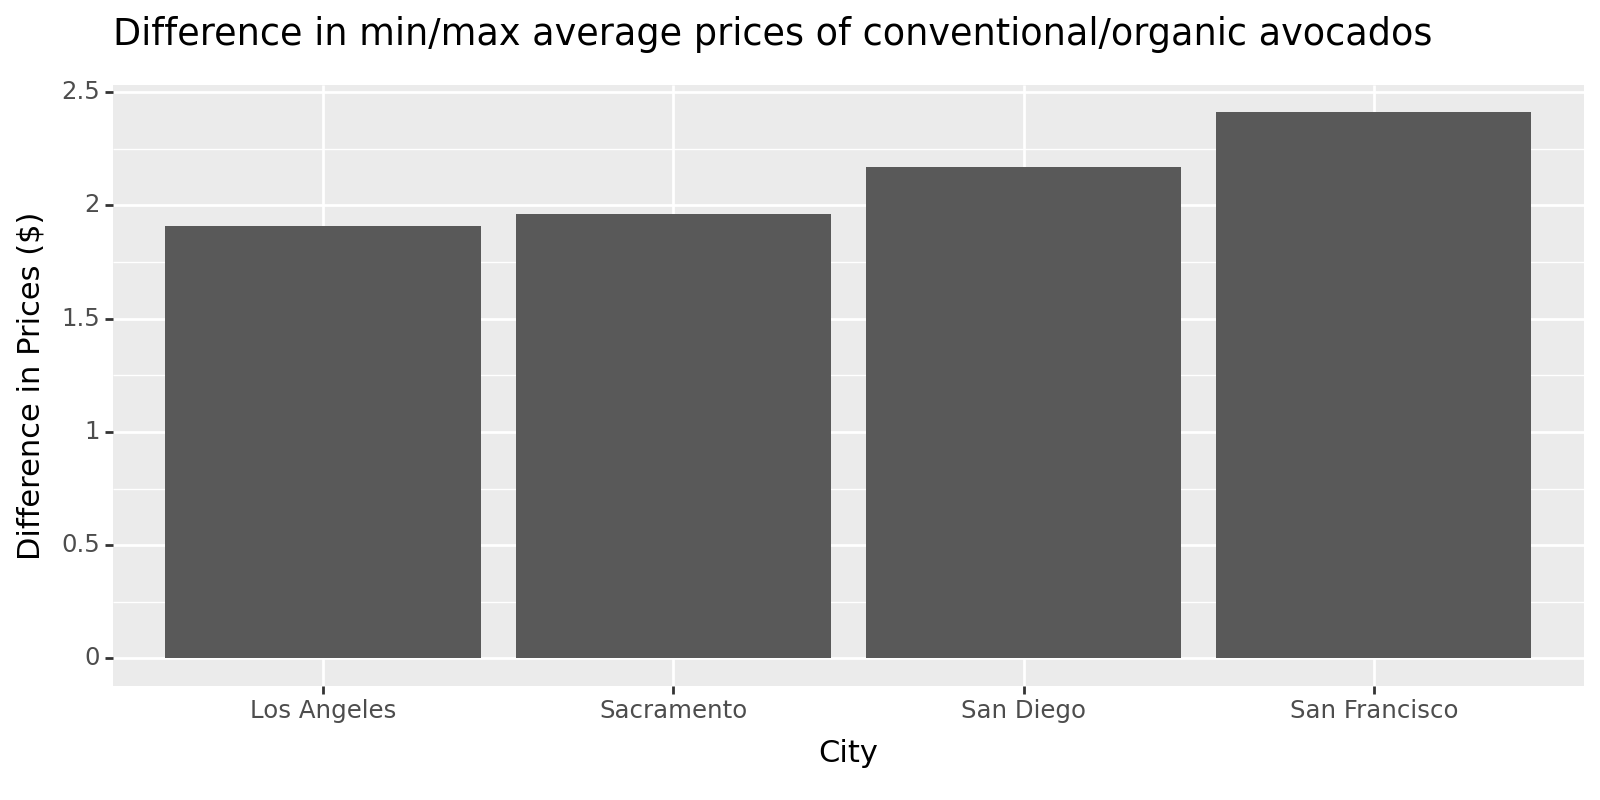

<Figure Size: (800 x 400)>

In [73]:
Plot3 = (ggplot(CA_diff2)
+ geom_col(aes(
  x = "geography",
  y = "average_price"))
+ labs(x = "City",
       y = "Difference in Prices ($)")
+ labs(title = "Difference in min/max average prices of conventional/organic avocados")
+ theme(figure_size = (8,4))
)
Plot3

**Task 8**

*Recreate the plot*

In [63]:
# Convert to long format and find mean of each size
CA_long = pd.melt(CA_regions, id_vars=['geography', 'type'],
                  value_vars=['small', 'large', 'xlarge'], var_name = 'size', value_name = "count")
CA_long = CA_long.groupby(['geography', 'type', 'size']).mean()
CA_long

count
geography     type         size                
Los Angeles   conventional large   4.438423e+05
                           small   1.172952e+06
                           xlarge  9.707364e+04
              organic      large   2.080422e+04
                           small   1.444206e+04
                           xlarge  6.035294e+00
Sacramento    conventional large   2.430051e+05
                           small   1.412831e+05
                           xlarge  6.333280e+03
              organic      large   4.282693e+03
                           small   2.808893e+03
                           xlarge  7.726797e-01
San Diego     conventional large   1.401061e+05
                           small   1.637928e+05
                           xlarge  1.796354e+04
              organic      large   7.273785e+03
                           small   2.573068e+03
                           xlarge  1.323595e+00
San Francisco conventional large   4.493774e+05
                           small   2.158398e+05
                           xlarge  1.493160e+04
              organic      large   1.135010e+04
                           small   8.303041e+03
                           xlarge  2.159346e+00

In [64]:
# Reset index
CA_counts = CA_long.reset_index()
CA_counts

,geography,type,size,count
0,Los Angeles,conventional,large,4.438423e+05
1,Los Angeles,conventional,small,1.172952e+06
2,Los Angeles,conventional,xlarge,9.707364e+04
3,Los Angeles,organic,large,2.080422e+04
4,Los Angeles,organic,small,1.444206e+04
5,Los Angeles,organic,xlarge,6.035294e+00
6,Sacramento,conventional,large,2.430051e+05
7,Sacramento,conventional,small,1.412831e+05
8,Sacramento,conventional,xlarge,6.333280e+03
9,Sacramento,organic,large,4.282693e+03


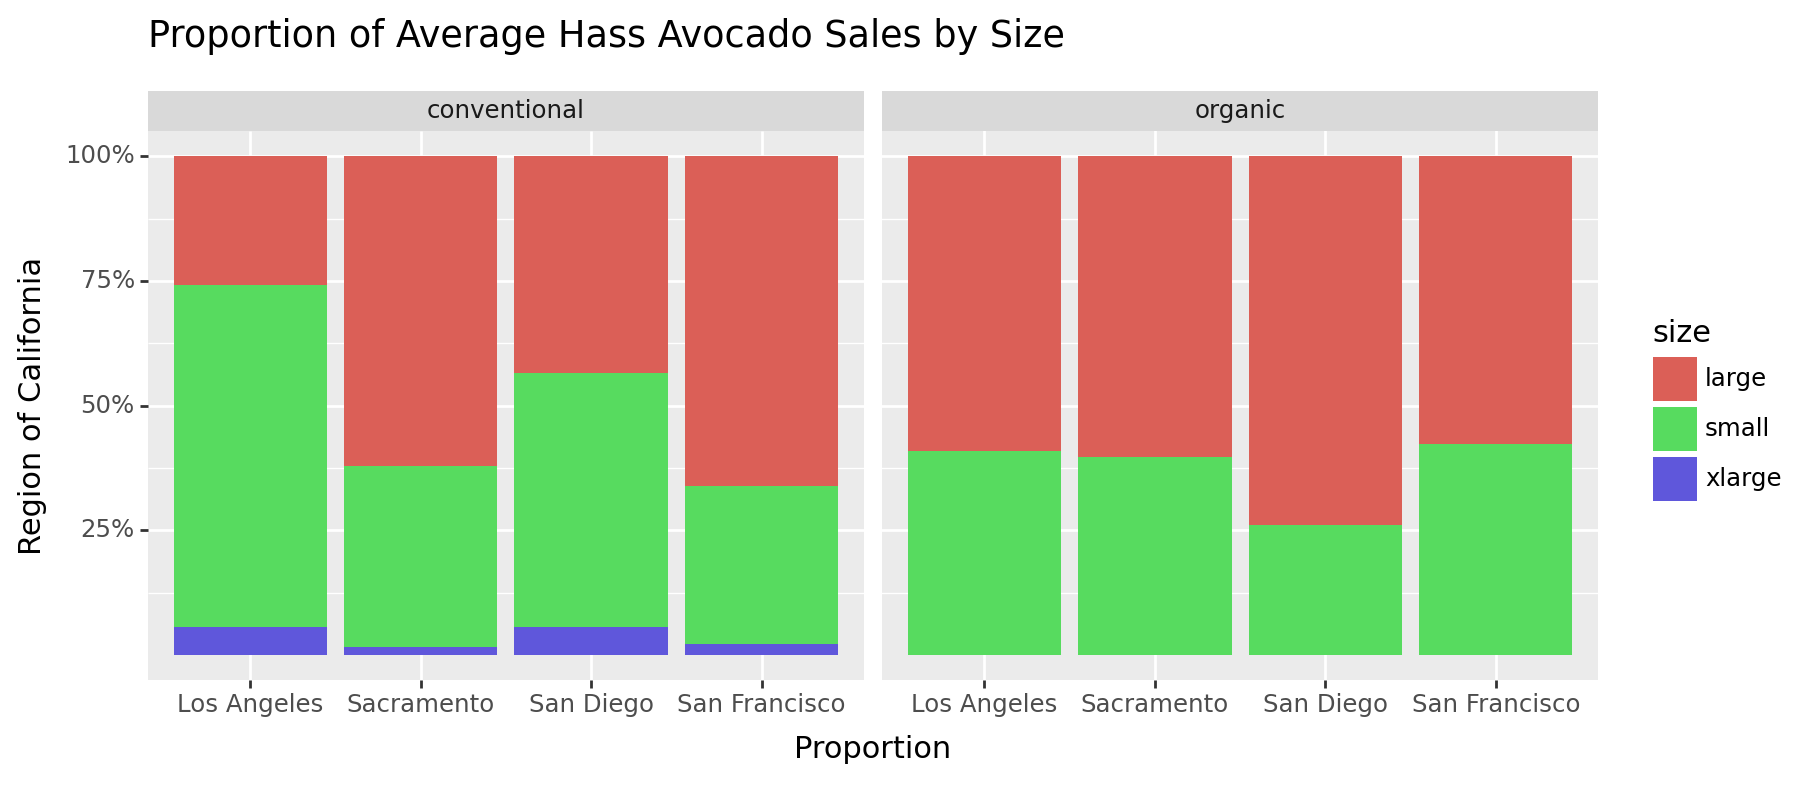

<Figure Size: (900 x 400)>

In [65]:
Plot4 = (ggplot(CA_counts)
+ geom_col(aes(
  x = "geography",
  y = "count",
  fill = "size"),
  position = "fill")
+ facet_wrap("type")
+ theme(figure_size = (9,4))
+ xlab("Proportion")
+ ylab("Region of California")
+ labs(title = "Proportion of Average Hass Avocado Sales by Size")
+ scale_y_continuous(breaks = [0.25, 0.50, 0.75, 1],
                     labels = ["25%", "50%", "75%", "100%"])
)
Plot4


**Using Outside Data**

*Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.*

*Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.*

*Support your argument with a plot.*

In [94]:
# Import housing data
house = pd.read_csv('/content/drive/My Drive/Sale_Prices_City.csv')
house.head()

,Unnamed: 0,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,0,6181,New York,New York,1,NaN,NaN,NaN,NaN,NaN,...,564600.0,561900.0,576000.0,561200.0,563300.0,568300.0,567700.0,563600.0,553400.0,563800.0
1,1,12447,Los Angeles,California,2,507200.0,489000.0,464400.0,454700.0,439600.0,...,686000.0,702500.0,702400.0,703600.0,707100.0,711500.0,716800.0,712300.0,710800.0,722800.0
2,2,39051,Houston,Texas,3,138700.0,135200.0,131700.0,130600.0,133000.0,...,205000.0,206700.0,205300.0,209100.0,209000.0,207200.0,207900.0,208100.0,213500.0,NaN
3,3,17426,Chicago,Illinois,4,330300.0,320000.0,296000.0,277800.0,270400.0,...,266700.0,299700.0,297700.0,287000.0,276800.0,274100.0,272000.0,270200.0,266600.0,270400.0
4,4,6915,San Antonio,Texas,5,130200.0,131200.0,131300.0,131700.0,131700.0,...,189500.0,191100.0,193600.0,196400.0,197400.0,199200.0,201300.0,202100.0,204700.0,NaN


In [95]:
# Rename "RegionName" to "geography"
house.rename(columns={'RegionName': 'geography'}, inplace=True)

In [96]:
# Only include data from specified cities
CA_house = house.query('geography in ["Los Angeles", "San Diego", "Sacramento",  "San Francisco"]')
CA_house

,Unnamed: 0,RegionID,geography,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
1,1,12447,Los Angeles,California,2,507200.0,489000.0,464400.0,454700.0,439600.0,...,686000.0,702500.0,702400.0,703600.0,707100.0,711500.0,716800.0,712300.0,710800.0,722800.0
8,8,54296,San Diego,California,9,416800.0,404000.0,395200.0,381800.0,372000.0,...,595700.0,598300.0,599200.0,595700.0,596400.0,595900.0,602000.0,603200.0,612700.0,NaN
14,14,20330,San Francisco,California,15,791300.0,794900.0,794600.0,794500.0,795600.0,...,1307400.0,1293600.0,1337400.0,1336800.0,NaN,NaN,NaN,NaN,NaN,NaN
29,29,20288,Sacramento,California,30,208000.0,189800.0,173500.0,166100.0,160100.0,...,311600.0,312900.0,312900.0,311400.0,313700.0,320200.0,319200.0,321700.0,314000.0,322000.0


In [97]:
# Only include data from 2015-2020
CA_house = CA_house[['geography'] + [col for col in CA_house.columns if col.startswith('2015')]+ [col for col in CA_house.columns if col.startswith('2016')]+ [col for col in CA_house.columns if col.startswith('2017')]+ [col for col in CA_house.columns if col.startswith('2018')]+ [col for col in CA_house.columns if col.startswith('2019')]+ [col for col in CA_house.columns if col.startswith('2020')]]
CA_house

,geography,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
1,Los Angeles,473800.0,480900.0,485700.0,491300.0,488600.0,489800.0,493200.0,502700.0,503700.0,...,686000.0,702500.0,702400.0,703600.0,707100.0,711500.0,716800.0,712300.0,710800.0,722800.0
8,San Diego,463500.0,471900.0,479800.0,480100.0,476600.0,476300.0,480400.0,481500.0,474400.0,...,595700.0,598300.0,599200.0,595700.0,596400.0,595900.0,602000.0,603200.0,612700.0,NaN
14,San Francisco,1019500.0,1041700.0,1066000.0,1103400.0,1118900.0,1128700.0,1133600.0,1117900.0,1114600.0,...,1307400.0,1293600.0,1337400.0,1336800.0,NaN,NaN,NaN,NaN,NaN,NaN
29,Sacramento,209900.0,218000.0,221200.0,226300.0,223200.0,228200.0,226800.0,227900.0,227800.0,...,311600.0,312900.0,312900.0,311400.0,313700.0,320200.0,319200.0,321700.0,314000.0,322000.0


In [99]:
# Convert to long format
date_columns = [col for col in CA_house.columns if col.startswith('20')]

CA_melt = CA_house.melt(id_vars='geography', value_vars=date_columns, var_name='dates', value_name='prices')
CA_melt

         geography    dates     prices
0      Los Angeles  2015-01   473800.0
1        San Diego  2015-01   463500.0
2    San Francisco  2015-01  1019500.0
3       Sacramento  2015-01   209900.0
4      Los Angeles  2015-02   480900.0
..             ...      ...        ...
231     Sacramento  2019-10   314000.0
232    Los Angeles  2019-11   722800.0
233      San Diego  2019-11        NaN
234  San Francisco  2019-11        NaN
235     Sacramento  2019-11   322000.0

[236 rows x 3 columns]


In [104]:
# Split "dates" variable into "year" and "month"
CA_melt[['year', 'month']] = CA_melt['dates'].str.split('-', 1).tolist()
CA_melt

<ipython-input-104-a0f7861231d3>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.


,geography,dates,prices,year,month
0,Los Angeles,2015-01,473800.0,2015,01
1,San Diego,2015-01,463500.0,2015,01
2,San Francisco,2015-01,1019500.0,2015,01
3,Sacramento,2015-01,209900.0,2015,01
4,Los Angeles,2015-02,480900.0,2015,02
...,...,...,...,...,...
231,Sacramento,2019-10,314000.0,2019,10
232,Los Angeles,2019-11,722800.0,2019,11
233,San Diego,2019-11,NaN,2019,11
234,San Francisco,2019-11,NaN,2019,11


In [ ]:
# Only include variables we need for CA_housing
CA_housing = CA_melt[['geography'] + ['prices'] + ['month']  + ['year']]
CA_housing

In [115]:
# Only include variables we need for CA_region, then find averages for each month of each year
CA_region = CA_regions[['geography'] + ['average_price'] + ['month']  + ['year']]
CA_region = CA_region.groupby(['geography', 'month', 'year'])['average_price'].mean()
CA_region = CA_region.reset_index()
CA_region

,geography,month,year,average_price
0,Los Angeles,1,2015,1.05000
1,Los Angeles,1,2016,0.91300
2,Los Angeles,1,2017,0.96300
3,Los Angeles,1,2018,1.41300
4,Los Angeles,1,2019,1.30125
...,...,...,...,...
279,San Francisco,12,2015,1.51125
280,San Francisco,12,2016,1.96000
281,San Francisco,12,2017,1.57700
282,San Francisco,12,2018,2.31000


In [120]:
# Convert "year" and "month" to numeric for both dataframes
CA_housing['month'] = pd.to_numeric(CA_housing['month'])
CA_housing['year'] = pd.to_numeric(CA_housing['year'])

CA_region['month'] = pd.to_numeric(CA_region['month'])
CA_region['year'] = pd.to_numeric(CA_region['year'])

# Merge dataframes
CA_data = pd.merge(CA_housing, CA_region, on=['month', 'year', 'geography'])
CA_data

<ipython-input-120-d43a33f59c02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-120-d43a33f59c02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,geography,prices,month,year,average_price
0,Los Angeles,473800.0,1,2015,1.05000
1,San Diego,463500.0,1,2015,1.07750
2,San Francisco,1019500.0,1,2015,1.17000
3,Sacramento,209900.0,1,2015,1.21500
4,Los Angeles,480900.0,2,2015,1.06250
...,...,...,...,...,...
231,Sacramento,314000.0,10,2019,1.50750
232,Los Angeles,722800.0,11,2019,1.35000
233,San Diego,NaN,11,2019,1.36750
234,San Francisco,NaN,11,2019,1.58500


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


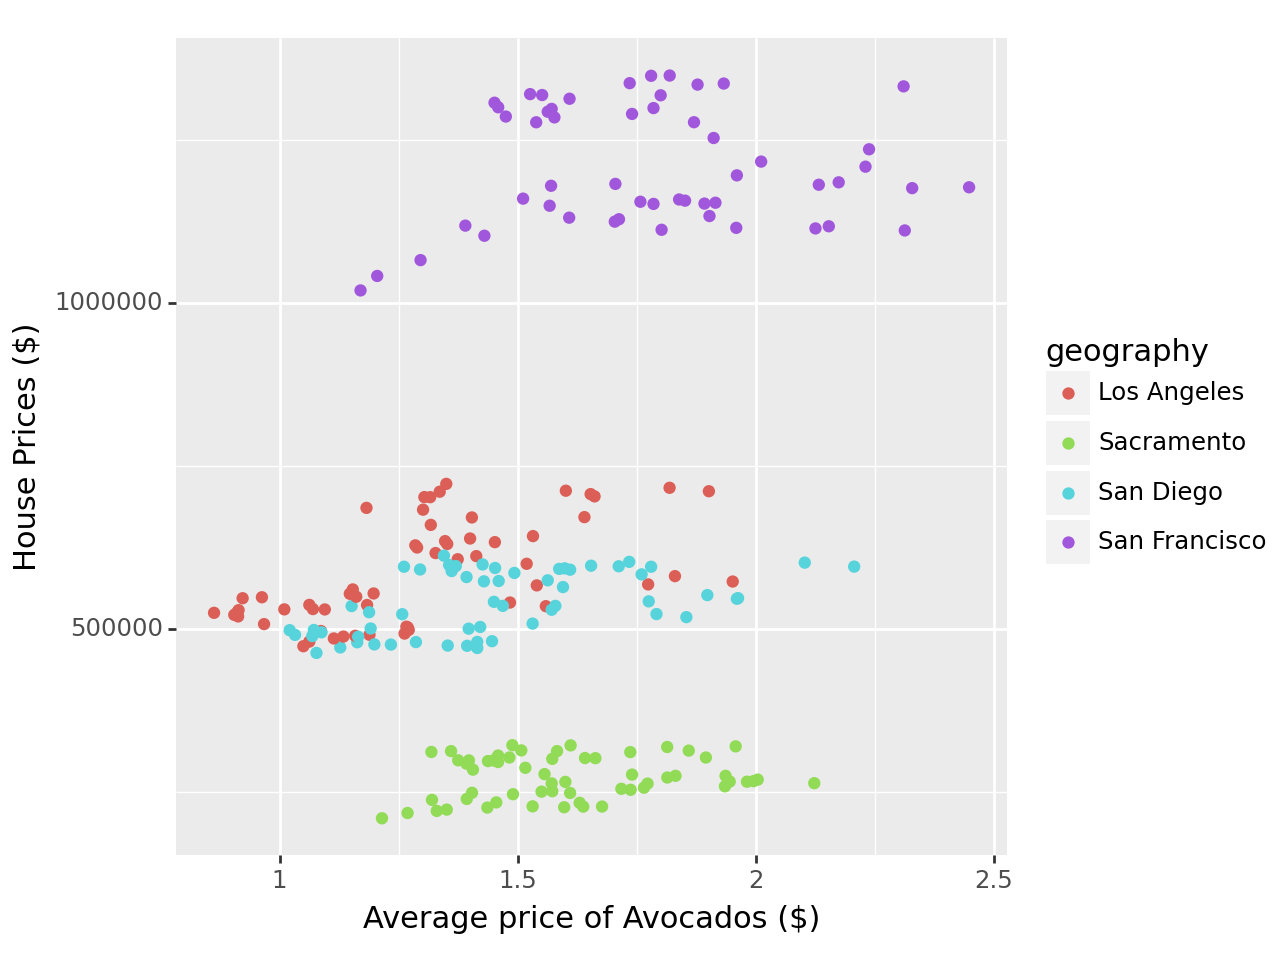

<Figure Size: (640 x 480)>

In [142]:
# Create plot of housing price vs. avocado prices
Plot5 = (ggplot(CA_data,
aes(
  x = "average_price",
  y = "prices",
  color = "geography"
))
+ geom_point()
+ labs(fill = "City",
       x = "Average price of Avocados ($)",
       y = "House Prices ($)")
)
Plot5

From the graph above you can see that for each city, as average price of avocados goes up, as do house prices.  You can see that for each city the data has a positive association.  It is important to note that it is very unlikely there is any causation between these 2 variables.  There are other things at play here such as inflation raising house and avacado prices as well as housing prices rising in these specific areas over time.